In [ ]:
## Code for exploring the gensim topic models

In [3]:
# packages

import sys

import random
import pandas as pd
import os
import gzip
import glob




In [ ]:
import gensim
from gensim import corpora
from gensim.models import ldaseqmodel, LdaSeqModel, LdaModel,LdaMulticore
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

import re
import matplotlib.pyplot as plt

In [2]:
# new models

paths = glob.glob("../models/LDA_bow_*.model")
models =[]
for p in paths:
    
    print(p.split("24/")[1])
    #a_model = LdaMulticore.load(p)
    #models.append(a_model)


## Data

In [5]:
# metadata from pandas
pd.set_option('display.max_colwidth', 200)

#path
mdfpath= "../data/s24_forest_v2.csv"
# read
mdf=pd.read_csv(mdfpath, sep="\t")

mdf.head() ###C: <text comment_id=59203728 date=2013-01-03 datetime=2013-01-03 13:02:01 author=päästä parent_comment_id=0 quoted_comment_id=0 author_logged_in=n nick_type=anonymous thread_id=11159573 tim

,index,text,info,lemmas,text_preprocessed,bigrams,length,date,id,comment_id,time,parent_id,author,msg_type,year
0,14559,"jos tykkäät lukea negatiivisiä juttuja,jumalan sanan pilkkaamista,kuinka ihminen ei pysty elämään eteen päin vaan jankuttaa samoista asioista koko ajan ,hakkuu kaikki muut ihmiset,valehtelee jne.v...",###C: <text comment_id=47428382 date=2011-01-01 datetime=2011-01-01 00:31:50 author=ylen annan parent_comment_id=47395920 quoted_comment_id=47411490 author_logged_in=n nick_type=anonymous thread_i...,"jos tykätä lukea negatiivinen juttu , jumala sana pilkkaaminen , kuinka ihminen ei pystyä elämä eteen päin vaan jankuttaa sama asia koko aika , hakkuu kaikki muu ihminen , valehdella jne.vinkki si...",tykätä lukea negatiivinen juttu jumala sana pilkkaaminen kuinka ihminen pystyä elämä eteen päin jankuttaa sama asia koko aika hakkuu kaikki muu ihminen valehdella jnevinkki tavata irlja palsta jaa...,tykätä lukea negatiivinen juttu jumala sana pilkkaaminen kuinka ihminen pystyä elämä eteen päin jankuttaa sama asia koko aika hakkuu kaikki muu ihminen valehdella jnevinkki tavata irlja palsta jaa...,43,2011-01-01,9561985:47428382,47428382,00:31:50,47395920,ylen annan,comment,2011
1,14578,"Moi suuri kiitos retkenjärjestäjävinkistäsi! Kuulen mielelläni lisää, sillä olemme tulossa Khao Lakiin maaliskuussa 2011 ja tarkoitus on tällä Thaikku-reissulla retkeillä ja snorklailla enemmän ku...",###C: <text comment_id=47431185 date=2011-01-01 datetime=2011-01-01 11:26:21 author=annijanne parent_comment_id=0 quoted_comment_id=0 author_logged_in=n nick_type=anonymous thread_id=9520672 time=...,"moi suuri kiitos retken#järjestäjä#vinkki ! kuulla mielellään lisää , sillä olla tulla Khao Laki maaliskuu 2011 ja tarkoitus olla tämä Thaikku#reissu retkeillä ja snorklailla enemmän kuin lojua ra...",moi suuri kiitos retkenjärjestäjävinkki kuulla mielellään lisää tulla khao laki maaliskuu tarkoitus thaikkureissu retkeillä snorklailla enemmän lojua ranta toki tulla tehdä ikäinen lapsi retki tyk...,moi suuri kiitos retkenjärjestäjävinkki kuulla mielellään lisää tulla khao_laki maaliskuu tarkoitus thaikkureissu retkeillä snorklailla enemmän lojua ranta toki tulla tehdä ikäinen lapsi retki tyk...,40,2011-01-01,9520672:47431185,47431185,11:26:21,0,annijanne,comment,2011
2,14562,"Kyllä viisailla ihmisillä on vapaa oikeus kaahata ympyrää niin perkeleesti ja polttaa bensaa aivan niin kuin haluaa, se on vaan kateellisten panettelua, kun valittavat muka jostain melusta, jota e...",###C: <text comment_id=47430322 date=2011-01-01 datetime=2011-01-01 09:42:20 author=YMMÄRTÄMÄTTÖMILTÄ parent_comment_id=47401007 quoted_comment_id=47429082 author_logged_in=n nick_type=anonymous t...,"kyllä viisas ihminen olla vapaa oikeus kaahata ympyrä niin perkeleesti ja polttaa bensa aivan niin kuin haluta , se olla vaan kateellinen panettelu , kun valittaa muka jokin melku , joka ei todell...",kyllä viisas ihminen vapaa oikeus kaahata ympyrä perkeleesti polttaa bensa aivan haluta kateellinen panettelu valittaa muka melku todellisuus edes luonnonsuojelualue sammakka sukupuolielämä ympyrä...,kyllä viisas ihminen vapaa oikeus kaahata ympyrä perkeleesti polttaa bensa aivan haluta kateellinen panettelu valittaa muka melku todellisuus edes luonnonsuojelualue sammakka sukupuolielämä ympyrä...,32,2011-01-01,9539023:47430322,47430322,09:42:20,47401007,YMMÄRTÄMÄTTÖMILTÄ,comment,2011
3,14588,Meille teki pihan täysremontin täällä Satakunnassa viime keväänä yksi yhdenmiehen firma. Homma käsitti kaikkea mahdollista puiden raivauksesta kaivu- ja viherrakennustöihin ja me olimme kyllä tosi...,###C: <text comment_id=47441336 date=2011-01-01 datetime=2011-01-01 23:53:24 author=pariskunt parent_comment_id=0 quoted_comment_id=0 author_logged_in=n nick_type=anonymous thread_id=9569037 time=...,minä tehdä piha täys#remontti täällä Satakunta viime kevät yksi yhden#mies firma . homma käsittää kaikki mahdollinen puu raivaus kaivu ja viher#rakennustö ja minä olla kyllä tosi tyytyväinen . kan...

In [5]:
# filter by length => the data set used in the topic model generation
df=mdf[mdf["length"]>5]#.drop_duplicates(subset="text")
df["text_id"]=df.index
print(len(df))
df.tail()


49036


/tmp/telmpeur/24188526/ipykernel_3468599/1010719196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_id"]=df.index


,index,text,info,lemmas,text_preprocessed,bigrams,length,date,id,comment_id,time,parent_id,author,msg_type,year,text_id
50268,25766,"Nyt minä ymmärrän sinua. Olet sen jälkeen joutunut sairaseläkkeelle. Hyviä eläkepäiviä sinulle! Saksaan ei saa rakentaa tuulivoimaloita, koska terveyshaitat niin suuret. Kielto ehdoton. Nyt saksal...",###C: <text msg_type=comment thread_id=16708995 comment_id=105833220 id=16708995:105833220 parent_comment_id=105810112 quoted_comment_id=105831929 date=2020-12-31 time=11:33:52 datetime=2020-12-31...,"nyt minä ymmärtää sinä . olla se jälkeen joutua sairas#eläke . hyvä eläke#päivä sinä ! Saksa ei saada rakentaa tuuli#voimala , koska terveys#haitta niin suuri . kielto ehdoton . nyt saksalainen te...",ymmärtää jälkeen joutua sairaseläke hyvä eläkepäivä saksa saada rakentaa tuulivoimala terveyshaitta suuri kielto ehdoton saksalainen tehdä upm vuokrasopimus maa kannonkoski tuulivoimala tyhmä suom...,ymmärtää jälkeen joutua sairaseläke hyvä eläkepäivä saksa saada rakentaa tuulivoimala terveyshaitta suuri kielto ehdoton saksalainen tehdä upm vuokrasopimus maa kannonkoski tuulivoimala tyhmä suom...,93,2020-12-31,16708995:105833220,105833220,11:33:52,105810112,Anonyymi author_logged_in=n,comment,2020,50268
50269,25178,"Ymmärrän! Olen 57. Minulla on ollut rintasyöpä, joka on hoidettu ”kaikilla herkuilla” kuusi vuotta sitten. Pään hikoilu alkoi olla häiritsevää suunnilleen kesällä 1998 tai niihin aikoihin. Käytän ...",###C: <text msg_type=comment thread_id=1167004 comment_id=105837018 id=1167004:105837018 parent_comment_id=84839765 quoted_comment_id=0 date=2020-12-31 time=15:25:31 datetime=2020-12-31 15:25:31 t...,"ymmärtää ! olla 57 . minä olla olla rinta#syöpä , joka olla hoitaa ” kaikki herkku ” kuusi vuosi sitten . pää hikoilu alkaa olla häiritsevä suunnilleen kesä 1998 tai se aika . käyttää nyt estrogee...",ymmärtää rintasyöpä hoitaa kaikki herkku kuusi vuosi pää hikoilu alkaa häiritsevä suunnilleen kesä aika käyttää estrogeeli limakalvo kuivuus takia hormoonihoito toimia vaikutus pää hikoilu väsynyt...,ymmärtää rintasyöpä hoitaa kaikki herkku kuusi vuosi pää hikoilu alkaa häiritsevä suunnilleen kesä aika käyttää estrogeeli limakalvo kuivuus takia hormoonihoito toimia vaikutus pää hikoilu väsynyt...,125,2020-12-31,1167004:105837018,105837018,15:25:31,84839765,Anonyymi author_logged_in=n,comment,2020,50269
50270,25762,Hyvä että lopetti. Mitä sitä pitkittämään jos tunne on loppunut. Ihan hauska tyyppi mutta ei mulle sopiva. Se mökkeily alasti oli ihan kiva. Ei niistä kukaan mitenkään vastemielinen ollut. Arastel...,###C: <text msg_type=comment thread_id=16708353 comment_id=105832538 id=16708353:105832538 parent_comment_id=105799569 quoted_comment_id=105813422 date=2020-12-31 time=10:58:13 datetime=2020-12-31...,hyvä että lopettaa . mikä se pitkittää jos tunne olla loppua . ihan hauska tyyppi mutta ei minä sopiva . se mökkeily alasti olla ihan kiva . ei se kukaan mitenkään vaste#mielinen olla . arastella ...,hyvä lopettaa pitkittää tunne loppua hauska tyyppi sopiva mökkeily alasti kiva kukaan mitenkään vastemielinen arastella epäröidä aluksi muoto vuoksi,hyvä lopettaa pitkittää tunne loppua hauska tyyppi sopiva mökkeily alasti kiva kukaan mitenkään vastemielinen arastella epäröidä aluksi muoto vuoksi,19,2020-12-31,16708353:105832538,105832538,10:58:13,105799569,Anonyymi author_logged_in=n,comment,2020,50270
50271,25796,Nato keskittyy tappamaan siviilejä lähi.idässä. Ei se jouda raivaus- ja pelastustehtäviin.,###C: <text msg_type=comment thread_id=16712399 comment_id=105833437 id=16712399:105833437 parent_comment_id=0 quoted_comment_id=0 date=2020-12-31 time=11:46:15 datetime=2020-12-31 11:46:15 thread...,Nato keskittyä tappaa siviili lähi#litä . ei se joutaa raivaus ja pelastus#tehtävä .,nato keskittyä tappaa siviili lähilitä joutaa raivaus pelastustehtävä,nato keskittyä tappaa siviili lähilitä joutaa raivaus pelastustehtävä,8,2020-12-31,16712399:105833437,105833437,11:46:15,0,Anonyymi author_logged_in=n,com

In [7]:
# see bigrams
bg_list=[]
for d in df["bigrams"]:
    for t in d.split():
        if "_" in t:
            bg_list.append(t)
from collections import Counter

# Count elements
counts = Counter(bg_list)

# Display counts
print("nr of bigrams:",len(counts))


# Sort by highest count
highest_counts = counts.most_common(50)  # sorted in descending order
print("Highest counts:", highest_counts)
print("")
# Sort by lowest count
lowest_counts = sorted(counts.items(), key=lambda x: x[1])  # ascending order
print("Lowest counts:", lowest_counts[:50])

nr of bigrams: 681
Highest counts: [('muun_muassa', 394), ('marjastaa_sienestää', 358), ('stora_enso', 347), ('marjastus_sienestys', 306), ('jokamies_oikeus', 294), ('eurooppa_unioni', 225), ('jatkuva_kasvatus', 224), ('laskea_uudelleen', 170), ('helsinki_sanoma', 154), ('näin_ollen', 146), ('kilometri_päässä', 143), ('tie_varsi', 137), ('edellä_mainita', 137), ('kiinnittää_huomio', 128), ('miljoona_kuutio', 127), ('avaus_marjo', 127), ('fossiilinen_polttoaine', 123), ('urho_kekkonen', 121), ('ennen_kaikkea', 116), ('mekaaninen_metsäteollisuus', 114), ('jäljelle_jäädä', 112), ('julkinen_sektori', 109), ('leikata_nurmikko', 109), ('sitoa_hiili', 108), ('juha_sipilä', 107), ('kestävä_kehitys', 106), ('kalastaa_marjastaa', 105), ('metsästys_kalastus', 105), ('metri_päässä', 103), ('loppujen_lopuksi', 103), ('hua_hin', 103), ('pentti_linkola', 103), ('toisin_sanoen', 98), ('tuleva_sukupolvi', 98), ('nuuksio_kansallispuisto', 98), ('ville_niinistö', 97), ('sauli_niinistö', 96), ('kalastus_m

In [7]:
# corpus and dictionary

# Importing necessary Gensim libraries
from gensim import corpora

# File paths to the saved dictionary and corpus

DICT_PATH="/scratch/project_2008526/telmap/suomi24/models/s24_topicmodel_gensim_v5.dict"
CORPUS_PATH="/scratch/project_2008526/telmap/suomi24/models/s24_topicmodel_gensim_v5.mm"
CORPUS_PATH_TFIDF="/scratch/project_2008526/telmap/suomi24/models/s24_topicmodel_gensim_tfidf.mm"
# Load the dictionary
dictionary = corpora.Dictionary.load(DICT_PATH)

# Load the corpus in .mm format
corpus_from_file = corpora.MmCorpus(CORPUS_PATH)
corpus_tfidf = corpora.MmCorpus(CORPUS_PATH_TFIDF)

data_long=df[(df["length"]>5) & (df["year"]>2013)]["bigrams"]

txt=[d.split() for d in data_long]
corpus = [dictionary.doc2bow(text, allow_update=False) for text in txt]
# Inspecting the dictionary and corpus

# Dictionary: Check the token-id to word mapping
print("Dictionary:")
n=0
m=0
for token_id, word in dictionary.items():
    if n > 10:
        break
    print(f"Token ID: {token_id}, Word: {word}")
    n+=1

# Corpus: Inspect the loaded corpus (list of tuples where each tuple is (token_id, token_count))
print("\nCorpus (Bag of Words):")
for doc_id, doc in enumerate(corpus):
    if m> 10:
        break
    print(f"Document {doc_id}: {doc}")
    m+=1

# Corpus in a readable format (mapping token_ids back to words)
print("\nCorpus (Readable Format):")
m=0
for doc_id, doc in enumerate(corpus):
    if m> 10:
        break
    words = [(dictionary[token_id], count) for token_id, count in doc]
    print(f"Document {doc_id}: {words}")
    m+=1


Dictionary:
Token ID: 0, Word: asiakirja
Token ID: 1, Word: ennakkotapaus
Token ID: 2, Word: erä
Token ID: 3, Word: haki
Token ID: 4, Word: hyvä
Token ID: 5, Word: juttu
Token ID: 6, Word: kiinnostaa
Token ID: 7, Word: liikemies
Token ID: 8, Word: luvaton
Token ID: 9, Word: metsänomistaja
Token ID: 10, Word: metsäpalsta

Corpus (Bag of Words):
Document 0: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1)]
Document 1: [(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 2), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1)]
Document 2: [(16, 1), (31, 1), (48, 1), (66,

In [8]:
df[(df["length"]>5) & (df["year"]>2013)].head()

,index,text,info,lemmas,text_preprocessed,bigrams,length,date,id,comment_id,time,parent_id,author,msg_type,year,text_id
15301,25880,"Venäläinen liikemies on tuomittu varkaudesta ja petoksesta. Sortavalan Oikeustalossa saatiin viime viikolla suomalaisia kiinnostava juttu päätökseen. Erän venäläinen ""liikemies"" tuomittiin 2 vuode...",###C: <text comment_id=0 date=2014-01-01 datetime=2014-01-01 22:56:01 author=Sortavalan parent_comment_id=0 quoted_comment_id=0 author_logged_in=n nick_type=anonymous thread_id=11963672 time=22:56...,"venäläinen liike#mies olla tuomita varkaus ja petos . Sortavala oikeus#talo saada viime viikko suomalainen kiinnostaa juttu päätös . erä venäläinen "" liike#mies "" tuomita 2 vuosi vankeus suomalain...",venäläinen liikemies tuomita varkaus petos sortavala oikeustalo saada viime viikko suomalainen kiinnostaa juttu päätös erä venäläinen liikemies tuomita vuosi vankeus suomalainen metsänomistaja omi...,venäläinen liikemies tuomita varkaus petos sortavala oikeustalo saada viime viikko suomalainen kiinnostaa juttu päätös erä venäläinen liikemies tuomita vuosi vankeus suomalainen metsänomistaja omi...,31,2014-01-01,11963672:0,0,22:56:01,0,Sortavalan,thread_start,2014,15301
15302,25843,"Aikuisten oikeasti. Hyvälaatuinen ja oikein mitoitettu runko on tärkein osatekijä mukavuudesta. Seuraavaksi tärkein ovat kiekot. Yleisesti käytetyistä runkomateriaaleista alumiini on kova, epämuka...",###C: <text comment_id=65365361 date=2014-01-01 datetime=2014-01-01 16:50:09 author=Alkup. Maantiepyöräi parent_comment_id=65341357 quoted_comment_id=65363666 author_logged_in=n nick_type=anonymou...,"aikuinen oikeasti . hyvä#laatuinen ja oikein mitoittaa runko olla tärkeä osa#tekijä mukavuus . seuraavaksi tärkeä olla kiekko . yleisesti käyttää runko#materiaali alumiini olla kova , epä#mukava ....",aikuinen oikeasti hyvälaatuinen oikein mitoittaa runko tärkeä osatekijä mukavuus seuraavaksi tärkeä kiekko yleisesti käyttää runkomateriaali alumiini kova epämukava teräs kuitu taas keskimäärin mu...,aikuinen oikeasti hyvälaatuinen oikein mitoittaa runko tärkeä osatekijä mukavuus seuraavaksi tärkeä kiekko yleisesti käyttää runkomateriaali alumiini kova epämukava teräs kuitu taas keskimäärin mu...,55,2014-01-01,11959898:65365361,65365361,16:50:09,65341357,Alkup. Maantiepyöräi,comment,2014,15302
15303,25845,"Jos Kekkosen aika ei näy mitenkään erikoisena jaksona Suomen talouskasvussa, ei pidä myöskään väittää, että ""Kekkonen oli suurin syy siihen että Suomi JÄI JÄLKEEN länsimaista sivistyksessä, taloud...",###C: <text comment_id=65362733 date=2014-01-01 datetime=2014-01-01 14:24:47 author=Pystyyn_kuollut parent_comment_id=65361570 quoted_comment_id=65362370 author_logged_in=y nick_type=registered th...,"jos Kekkonen aika ei näkyä mitenkään erikoinen jakso Suomi talous#kasvu , ei pitää myöskään väittää , että "" Kekkonen olla suuri syy se että Suomi JäI JäLKE länsi#mainen sivistys , talous ja kaikk...",kekkonen aika näkyä mitenkään erikoinen jakso suomi talouskasvu pitää myöskään väittää kekkonen suuri syy suomi jäi jälke länsimainen sivistys talous kaikki muu tosiasia suomi teollistumiskehitys ...,kekkonen aika näkyä mitenkään erikoinen jakso suomi talouskasvu pitää myöskään väittää kekkonen suuri syy suomi jäi jälke länsimainen sivistys talous kaikki muu tosiasia suomi teollistumiskehitys ...,71,2014-01-01,11962395:65362733,65362733,14:24:47,65361570,Pystyyn_kuollut,comment,2014,15303
15304,25806,"tuottavista aloista, kuten metsäteollisuus, jos ko alat putoavat nollaan, jota en usko, paskapaperia tarvitaan aina, ei tarvita pii laaksoakaan..",###C: <text comment_id=65357341 date=2014-01-01 datetime=2014-01-01 04:40:29 author=Kyse oli parent_comment_id=65308912 quoted_comment_id=65355821 author_logged_in=n nick_type=anonymous thread_id=...,"tuottava ala , kuten metsä#teollisuus , jos kun ala pudota nolla , joka ei uskoa , paska#paperi tarvita aina , ei tarvita pi laakso ..",tuottava ala kuten metsäteollisuus ala pudota nolla uskoa paska

In [9]:
print(len(corpus))
print(len(corpus_from_file))
print(len(df[(df["length"]>5) & (df["year"]>2013)]))
text_list=list(df[(df["length"]>5) & (df["year"]>2013)]["text"])

33989
33989
33989


In [10]:
# yleisimmät sanat korpuksessa
from collections import defaultdict

# Initialize a defaultdict to count token frequencies
token_frequencies = defaultdict(int)

# Count token occurrences in the corpus
for doc in corpus:
    for token_id, count in doc:
        token_frequencies[token_id] += count

# Sort tokens by frequency in descending order
sorted_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)

# Display the top N most frequent tokens along with their words and counts
N = 50 
print(f"Top {N} most frequent tokens:")
for token_id, frequency in sorted_tokens[:N]:
    print(f"Word: '{dictionary[token_id]}', Frequency: {frequency}")

Top 50 most frequent tokens:
Word: 'saada', Frequency: 17959
Word: 'tulla', Frequency: 14819
Word: 'metsä', Frequency: 14448
Word: 'suomi', Frequency: 14203
Word: 'tehdä', Frequency: 13339
Word: 'kaikki', Frequency: 11911
Word: 'pitää', Frequency: 11819
Word: 'hyvä', Frequency: 11193
Word: 'aika', Frequency: 10865
Word: 'vuosi', Frequency: 10521
Word: 'muu', Frequency: 10212
Word: 'oma', Frequency: 8071
Word: 'mennä', Frequency: 7901
Word: 'puu', Frequency: 7642
Word: 'asia', Frequency: 7404
Word: 'ihminen', Frequency: 7142
Word: 'kyllä', Frequency: 6821
Word: 'maa', Frequency: 6820
Word: 'suuri', Frequency: 6300
Word: 'käydä', Frequency: 5875
Word: 'paljon', Frequency: 5874
Word: 'sama', Frequency: 5304
Word: 'maksaa', Frequency: 5183
Word: 'toinen', Frequency: 5087
Word: 'haluta', Frequency: 5034
Word: 'uusi', Frequency: 5018
Word: 'alue', Frequency: 5017
Word: 'työ', Frequency: 4873
Word: 'luonto', Frequency: 4798
Word: 'hyvin', Frequency: 4669
Word: 'ottaa', Frequency: 4635
Word: '

## Coherence scores

In [11]:
out= "/scratch/project_2008526/telmap/suomi24/24142770.out"
out= "/scratch/project_2008526/telmap/suomi24/24148207.out"
out= "/scratch/project_2008526/telmap/suomi24/24167444.out"

with open(out, "r") as fp:
    logfile=fp.readlines()

model_scores=[]
for l in logfile:
    if l.startswith("saving"):
        modelname=l.split("/")[-1].strip()
        ntopics=re.findall(r"\d{2,3}", modelname)
        #print(modelname)
        #print(ntopics[0])
        
    elif l.startswith("Coherence"):
        score= float(l.split(": ")[1])
        #print(score)
        model_scores.append((ntopics[0],score))

print(model_scores)

[('25', 0.37459306080424315), ('50', 0.4767367923339815), ('75', 0.5828753422773706), ('100', 0.6595110695969266), ('125', 0.7023054278059101), ('150', 0.7140974872384718), ('175', 0.7205836090380305), ('200', 0.7271732125544217), ('225', 0.7275150322850283), ('250', 0.7274672681165789)]


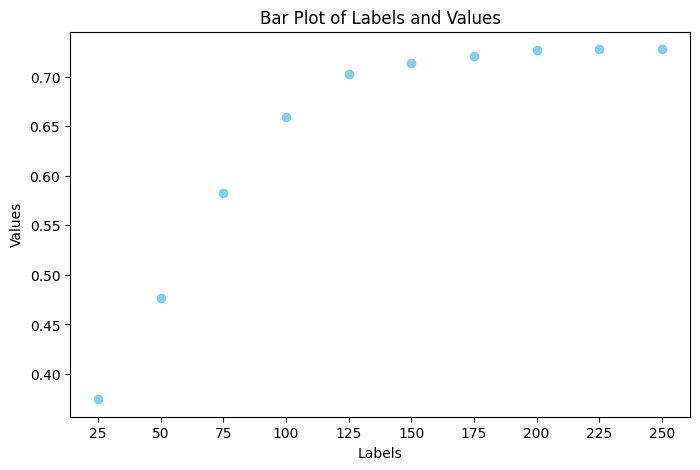

In [12]:
# plot coherence scores

# Separate labels and values
labels, values = zip(*model_scores)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.scatter(labels, values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Plot of Labels and Values')

# Display the plot
plt.show()


## Topics

In [13]:
multimodel = LdaMulticore(corpus=corpus,workers=2)

In [16]:
### # see topics

p="/scratch/project_2008526/telmap/suomi24/models/LDA_bow_gensim_50bigram_v5.model"
p ="models/LDA_tfidf_gensim_200bigram.model"
model=LdaMulticore.load(p)#LdaMulticore.load(p)
nr= 5
n =model.num_topics
print(n)
model.show_topics(num_topics=n)

200


[(0,
  '0.000*"mujejärvi" + 0.000*"itte" + 0.000*"levähdysalue" + 0.000*"huolettaa" + 0.000*"paina" + 0.000*"ängetä" + 0.000*"kulua" + 0.000*"perään" + 0.000*"synnillisyys" + 0.000*"kävelijä"'),
 (1,
  '0.000*"kauppinen" + 0.000*"metsästysalue" + 0.000*"käydä" + 0.000*"puolivalmiste" + 0.000*"grillikatos" + 0.000*"papana" + 0.000*"kiinteistökohtainen" + 0.000*"askeettinen" + 0.000*"perääntyä" + 0.000*"aytoiminta"'),
 (2,
  '0.000*"energiaomavarainen" + 0.000*"myllerrys" + 0.000*"koe" + 0.000*"etujärjestö" + 0.000*"pelimies" + 0.000*"pikavippi" + 0.000*"hontelo" + 0.000*"raparperi" + 0.000*"astalo" + 0.000*"sosialisointi"'),
 (3,
  '0.000*"kristus" + 0.000*"jakari" + 0.000*"vihkiä" + 0.000*"savikko" + 0.000*"terveyspommi" + 0.000*"laskuoppi" + 0.000*"kauppakorkeakoulu" + 0.000*"vähentääpuhe" + 0.000*"lisääntymis" + 0.000*"halpuuttaa"'),
 (4,
  '0.000*"mukainen" + 0.000*"korottaa" + 0.000*"göring" + 0.000*"huolettomasti" + 0.000*"omatoiminen" + 0.000*"älää" + 0.000*"pohjoispohjanmaa" + 0

In [18]:
# topic prevalence

ldamodel = model

# Get the topic distribution over the entire corpus
topic_prevalence = [0] * ldamodel.num_topics
nr_docs = [0] * ldamodel.num_topics

for doc in corpus:
    topic_distribution = ldamodel.get_document_topics(doc, minimum_probability=0.5) # take only more certain topics into account
    for topic_id, prob in topic_distribution:
        topic_prevalence[topic_id] += prob
        nr_docs[topic_id] += 1

# Sort topics by their prevalence in descending order
sorted_topics_by_prevalence = sorted(enumerate(topic_prevalence), key=lambda x: x[1], reverse=True)
sorted_topics_by_count = sorted(enumerate(nr_docs), key=lambda x: x[1], reverse=True)
# Display topics sorted by prevalence
for topic_id, prevalence in sorted_topics_by_prevalence:
    print(f"Topic ID: {topic_id}, Prevalence: {prevalence}")
    print(ldamodel.show_topic(topic_id))


Topic ID: 0, Prevalence: 0
[('mujejärvi', 3.74055e-05), ('itte', 3.740549e-05), ('levähdysalue', 3.7405207e-05), ('huolettaa', 3.7405123e-05), ('paina', 3.740506e-05), ('ängetä', 3.7405018e-05), ('kulua', 3.7404996e-05), ('perään', 3.740499e-05), ('synnillisyys', 3.740498e-05), ('kävelijä', 3.7404945e-05)]
Topic ID: 1, Prevalence: 0
[('kauppinen', 3.740632e-05), ('metsästysalue', 3.7406182e-05), ('käydä', 3.7406036e-05), ('puolivalmiste', 3.7405483e-05), ('grillikatos', 3.7405458e-05), ('papana', 3.74053e-05), ('kiinteistökohtainen', 3.7405247e-05), ('askeettinen', 3.7405225e-05), ('perääntyä', 3.740519e-05), ('aytoiminta', 3.7404974e-05)]
Topic ID: 2, Prevalence: 0
[('energiaomavarainen', 3.740597e-05), ('myllerrys', 3.740582e-05), ('koe', 3.740555e-05), ('etujärjestö', 3.740536e-05), ('pelimies', 3.740529e-05), ('pikavippi', 3.7405123e-05), ('hontelo', 3.7405087e-05), ('raparperi', 3.740498e-05), ('astalo', 3.7404923e-05), ('sosialisointi', 3.740489e-05)]
Topic ID: 3, Prevalence: 0
[

In [19]:
# esimerkkejä tietystä topicista

# Define the topic ID you're interested in
sorted_nr=12
target_topic_id = sorted_topics_by_prevalence[sorted_nr][0]  # Replace with the topic ID you are interested in

#alternatively define it here
target_topic_id = 3
print(target_topic_id)
# List to store documents that are strongly associated with the target topic
example_documents = []

# Threshold to filter documents that have a significant contribution from the target topic
threshold = 0.5  # Adjust based on how strong you want the topic to be in the document

# Iterate over each document in the corpus
for doc_id, doc in enumerate(corpus):
    # Get the topic distribution for the document
    topic_distribution = ldamodel.get_document_topics(doc, minimum_probability=0)
    
    # Find the probability of the target topic in this document
    for topic_id, prob in topic_distribution:
        if topic_id == target_topic_id and prob >= threshold:
            example_documents.append((doc_id, prob))  # Save document ID and its topic probability

# Sort the documents by the probability of the target topic in descending order
example_documents = sorted(example_documents, key=lambda x: x[1], reverse=True)



3


In [20]:

# Display the top N example documents

N = 40  # Number of example documents to display
for doc_id, prob in example_documents[:N]:
    print(f"Document ID: {doc_id}, Probability of Topic {target_topic_id}: {prob}")

    tokens = [dictionary[token_id] for token_id, count in corpus_from_file[doc_id]]
    #print(metadf.iloc[doc_id]["text"])
    print(tokens)
    #print(txt[doc_id],"\n")
    print(text_list[doc_id])
    print("\n")
    

In [21]:
# tail - where's a good threshold
N = 1000  # Number of example documents to display
for doc_id, prob in example_documents[:N]:
    if prob < 0.95 and prob > 0.85:
        print(f"Document ID: {doc_id}, Probability of Topic {target_topic_id}: {prob}")
    
        tokens = [dictionary[token_id] for token_id, count in corpus[doc_id]]
        #print(metadf.iloc[doc_id]["text"])
        print(df.loc[doc_id]["text"],"\n")

## model evaluation metrics

some links: 
https://github.com/kapadias/medium-articles/blob/master/natural-language-processing/topic-modeling/Evaluate%20Topic%20Models.ipynb

In [32]:
#texts = [t.split() for t in df2["text"]]
bigrams = [t.split() for t in df2["bigrams"]]

print(paths)

['/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_150bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_70bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_50bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_110bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_30bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_10bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_90bigram_v2.model', '/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_130bigram_v2.model']


In [33]:
from gensim.models import CoherenceModel
ldamodel = LdaMulticore.load(paths[nr])
cm = CoherenceModel(model=ldamodel, texts=bigrams, corpus=corpus,  coherence='c_v')
cm_umass = CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')

In [34]:
coherence_lda = cm.get_coherence()
print('Coherence Score: ', coherence_lda)

coherence_umass = cm_umass.get_coherence()
print('Coherence Score: ', coherence_umass)

Coherence Score:  0.4042340463777635
Coherence Score:  -7.562379652640537


In [37]:
doc_len= [len(l.split()) for l in df2["bigrams"]]
import numpy as np
print("min",min(doc_len))
print("max",max(doc_len))
print("mean", np.mean(doc_len))



min 10
max 549
mean 72.8037782738722


In [36]:
# Find indices of empty documents
empty_docs = [doc_id for doc_id, doc in enumerate(corpus) if len(doc) ==3]

if empty_docs:
    print(f"Short documents found at indices: {empty_docs}")
else:
    print("No short documents found.")

No short documents found.


In [38]:
# load all the models and calculate coherence scores
# Load the dictionary


#DICT_PATH="/scratch/project_2008526/telmap/suomi24/models/s24_model_bigram.dict"
#CORPUS_PATH="/scratch/project_2008526/telmap/suomi24/models/s24_bigram_corpus.mm"

dictionary_bg = corpora.Dictionary.load(DICT_PATH)

# Load the corpus in .mm format
corpus_bg = corpora.MmCorpus(CORPUS_PATH)



#model_list=[lda10,lda40,lda70,lda100,lda130]
c_v = []
u_mass = []
bgpaths = glob.glob("/scratch/project_2008526/telmap/suomi24/LDA_*bigram.model")

for i,p in enumerate(paths):
    print(p)
    ml= LdaMulticore.load(p)
    # c_v
    cm = CoherenceModel(model=ml,texts=bigrams, corpus=corpus_bg, coherence='c_v')
    coherence_lda = cm.get_coherence()
    c_v.append(coherence_lda)
    print('c_v score: ', coherence_lda)

    #u_mass
    cm = CoherenceModel(model=ml,corpus=corpus_bg, coherence='u_mass')
    coherence_lda = cm.get_coherence()
    u_mass.append(coherence_lda)
    print('u_mass score: ', coherence_lda)
    print("\n")


    

/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_150bigram_v2.model
c_v score:  0.3385784930385075
u_mass score:  -1.6550873184059753


/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_70bigram_v2.model
c_v score:  0.4025807040039049
u_mass score:  -2.68160013704293


/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_50bigram_v2.model
c_v score:  0.40972370991344514
u_mass score:  -2.944643968944436


/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_110bigram_v2.model
c_v score:  0.360207062441655
u_mass score:  -1.7168603919020777


/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_30bigram_v2.model
c_v score:  0.5139552103784876
u_mass score:  -4.353635093264046


/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_10bigram_v2.model
c_v score:  0.4042340463777635
u_mass score:  -7.562379652640537


/scratch/project_2008526/telmap/suomi24/LDA_bow_gensim_90bigram_v2.model
c_v score:  0.35947233028041103
u_mass score:  -2.0906309190306187


/scratch/projec

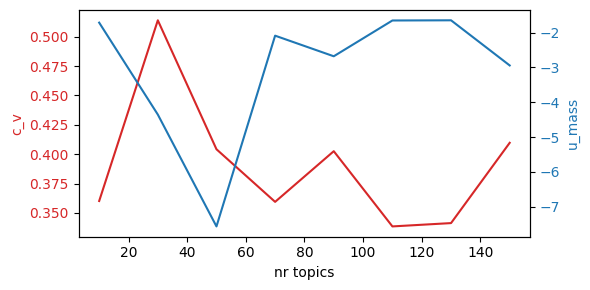

In [39]:
# plot both
import matplotlib.pyplot as plt
c_v_2 = [c*10 for c in c_v]
u_mass_pos = [u*(-1) for u in u_mass]
n_topics=[110,90,150,10,30,50,70,130]
coherence_df = pd.DataFrame({"c_v": c_v, "u_mass":u_mass,"n_topics":n_topics}).sort_values(by="n_topics")
#display(coherence_df)

# plot coherence scores
#plt.plot(coherence_df["n_topics"],coherence_df["c_v"], label = "c_v", color="green")
#plt.plot(coherence_df["n_topics"],coherence_df["u_mass"], label = "u_mass", color="blue")
#plt.legend()
#plt.show()

fig, ax1 = plt.subplots(figsize=(6,3))

color = 'tab:red'
ax1.set_xlabel('nr topics')
ax1.set_ylabel('c_v', color=color)
ax1.plot(coherence_df["n_topics"],coherence_df["c_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('u_mass', color=color)  # we already handled the x-label with ax1
ax2.plot(coherence_df["n_topics"],coherence_df["u_mass"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# 70 topics seems best according to c_v
# 10 topics best according to u_mass

In [30]:
#perplexity

#calculating model perplexity
pp=[]
for i,p in enumerate(paths):
    print(p)
    ml= LdaMulticore.load(p)
    perplexity = ml.log_perplexity(corpus_bg)
    pp.append(perplexity)
    print(perplexity, "\n")



/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_110bigram.model
-11.506982299904905 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_90bigram.model
-10.755581502234389 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_150bigram.model
-19.922907287233315 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_10bigram.model
-9.157180864190199 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_30bigram.model
-9.653828377494863 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_50bigram.model
-10.111624691833851 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_70bigram.model
-10.668587822575665 

/scratch/project_2008526/telmap/suomi24/models/LDA_bow_forest_130bigram.model
-17.944130060665124 



<Axes: xlabel='n_topics'>

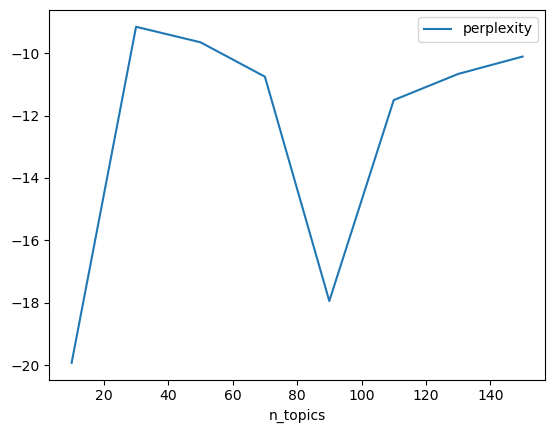

In [31]:
coherence_df = pd.DataFrame({"c_v": c_v, "u_mass":u_mass,"n_topics":n_topics,"perplexity":pp}).sort_values(by="n_topics")
#plot(c_v_2, n_topics, color='green', marker='o', linestyle='dashed',

#     linewidth=2, markersize=12)

coherence_df.plot("n_topics","perplexity")
# closer to zero is better
# so model 30 is best

In [53]:
# try model 30 inner coherence
print(paths[3])
ml30=LdaMulticore.load(paths[3])
ml30.get_coherence_per_topic(segmented_topics=None, with_std=False, with_support=False)

/scratch/project_2008526/telmap/suomi24/LDA_bow_forest_actors_30.model


AttributeError: 'LdaMulticore' object has no attribute 'get_coherence_per_topic'

## Patterns in data

In [27]:
# see distribution of the corpus per year
df["year"]=pd.DatetimeIndex(df['date']).year

df.groupby("year").size()

/tmp/telmpeur/24164062/ipykernel_481016/1821929075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=pd.DatetimeIndex(df['date']).year


year
2011    4788
2012    5080
2013    5184
2014    5653
2015    4631
2016    5116
2017    4190
2018    3765
2019    4610
2020    6035
dtype: int64

In [28]:
print(len(df))
print(len(df.drop_duplicates(subset="bigrams")))

49052
48973


In [43]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()


vis_data = gensimvis.prepare(ldamodel, corpus_from_file, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
# see texts associated with one topic:
